In [1]:
#Load dependencies
import numpy as np 
import pandas as pd 
import csv
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

train_df = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_df = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [2]:
#Set up training data
x_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df['label']

x_test = test_df.drop(labels = ["label"],axis = 1) 
y_test = test_df['label']


x_train_unscaled = x_train
x_test_unscaled = x_test


# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train shape: ",x_train.shape)
print("test shape: ",x_test.shape)


x_train_raw = x_train
x_test_raw = x_test

#Neural network versions of the data
#Reshaped for neural net algorithms
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 
xn_train = x_train.values.reshape(x_train.shape[0],*image_shape)
xn_test = x_test.values.reshape(x_test.shape[0],*image_shape)

print("x_train shape: ",xn_train.shape)
print("test shape: ",xn_test.shape)


# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
yn_train = np_utils.to_categorical(y_train, n_classes)
yn_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)



x_train shape:  (60000, 784)
test shape:  (10000, 784)
x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000,)


In [3]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(x_train_raw, y_train)

y_pred = gnb.predict(x_test_raw)

from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Results of Naive Bayes are poor, so running kNearestNeighbors

Model accuracy score: 0.5914


In [4]:
#Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_raw,y_train)

y_pred = neigh.predict(x_test_raw)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.8584


In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_unscaled,y_train)

y_pred = neigh.predict(x_test_unscaled)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8584


              precision    recall  f1-score   support

           0     0.7483    0.8710    0.8050      1000
           1     0.9888    0.9730    0.9808      1000
           2     0.7358    0.8190    0.7752      1000
           3     0.9122    0.8730    0.8922      1000
           4     0.8139    0.7740    0.7934      1000
           5     0.9928    0.8250    0.9011      1000
           6     0.6810    0.5870    0.6305      1000
           7     0.8810    0.9400    0.9095      1000
           8     0.9805    0.9530    0.9665      1000
           9     0.8817    0.9690    0.9233      1000

    accuracy                         0.8584     10000
   macro avg     0.8616    0.8584    0.8578     10000
weighted avg     0.8616    0.8584    0.8578     10000



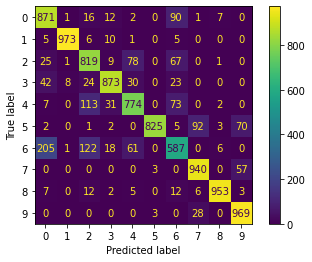

In [6]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 20 epochs
nn = model.fit(x_train, yn_train, batch_size=128, epochs=40, validation_data=(x_test, yn_test))



2022-04-06 23:46:38.493006: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-04-06 23:46:39.536160: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5702 - accuracy: 0.8044 - val_loss: 0.4383 - val_accuracy: 0.8481
Epoch 2/40
469/469 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8561 - val_loss: 0.3984 - val_accuracy: 0.8631
Epoch 3/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8660 - val_loss: 0.3701 - val_accuracy: 0.8726
Epoch 4/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8745 - val_loss: 0.3718 - val_accuracy: 0.8670
Epoch 5/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 0.8808 - val_loss: 0.3551 - val_accuracy: 0.8738
Epoch 6/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.8871 - val_loss: 0.3565 - val_accuracy: 0.8700
Epoch 7/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3054 - accuracy: 0.8885 - val_loss: 0.3238 - val_accuracy: 0.8843
Epoch 

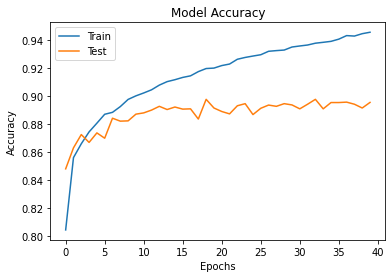

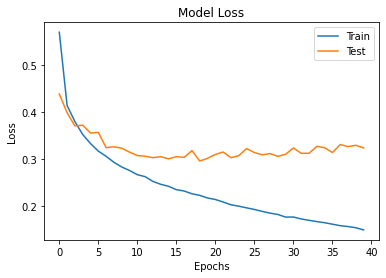

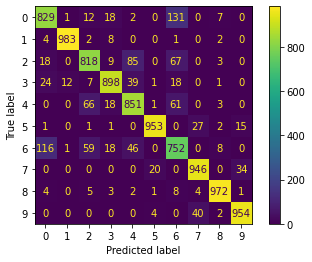

In [8]:
#Credit for this template for charting model results from classmates!
#Thanks for your great examples!

plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

y_pred = model.predict(x_test)
#Confusion Matrix
y_pred_classes = np.argmax(y_pred,axis = 1) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes);